## Section 1: Problem Formulation & Target Variable Analysis

### 1.1 Business Understanding

FinSecure is a peer-to-peer lending platform that connects borrowers and investors. Its success depends on accurately predicting whether a borrower will repay their loan in full or default.

A default in this context means the borrower failed to repay the loan amount as per the terms, represented in the dataset by loan_paid_back = 0.

The goal is to build a data-driven model that can estimate the probability that a loan will be repaid (loan_paid_back = 1), so that FinSecure can minimize financial risk and make faster, more reliable approval decisions.

### 1.2 Understanding the Target Variable

The target variable in this dataset is loan_paid_back, where:

1 → Loan was repaid in full (no default)

0 → Loan was not repaid (default occurred)

Target Variable Distribution:
                 count  proportion
loan_paid_back                    
1               214068   79.842157
0                54046   20.157843


C:\Users\rajsh\AppData\Local\Temp\ipykernel_12712\4112038723.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_paid_back', data=loan_data, palette='coolwarm')


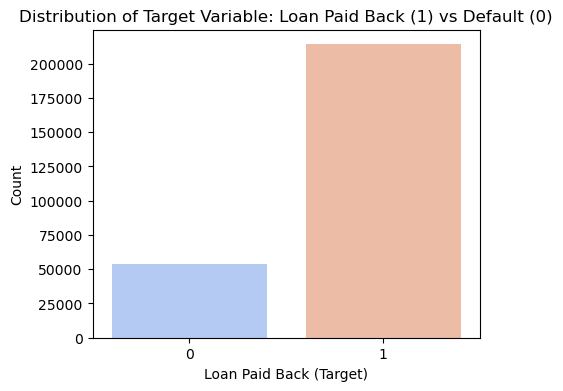

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


loan_data = pd.read_csv('loan_data.csv')

# Check the distribution of target variable
target_counts = loan_data['loan_paid_back'].value_counts()
target_percent = loan_data['loan_paid_back'].value_counts(normalize=True) * 100

# Display counts and percentages
print("Target Variable Distribution:")
print(pd.concat([target_counts, target_percent], axis=1).rename(columns={0:'Count', 1:'Percentage'}))

# Visualization
plt.figure(figsize=(5,4))
sns.countplot(x='loan_paid_back', data=loan_data, palette='coolwarm')
plt.title("Distribution of Target Variable: Loan Paid Back (1) vs Default (0)")
plt.xlabel("Loan Paid Back (Target)")
plt.ylabel("Count")
plt.show()


This indicates that most loans were repaid, and only a smaller fraction defaulted.

This imbalance suggests that the dataset is not perfectly balanced, meaning the model should be carefully evaluated using metrics like AUC instead of plain accuracy (since accuracy could be misleading in imbalanced datasets

### 1.3 Observations on Target Distribution

The target variable loan_paid_back shows the proportion of loans that were repaid vs defaulted.
This indicates that most loans were repaid, and only a smaller fraction defaulted.

This imbalance suggests that the dataset is not perfectly balanced, meaning the model should be carefully evaluated using metrics like AUC instead of plain accuracy (since accuracy could be misleading in imbalanced datasets).

### 1.4 Relationship of Key Features with the Target

To gain a better understanding of what factors might affect loan repayment, let’s explore how some key numerical variables relate to the target variable loan_paid_back.

C:\Users\rajsh\AppData\Local\Temp\ipykernel_12712\3832518372.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_paid_back', y=col, data=loan_data, palette='Set2')
C:\Users\rajsh\AppData\Local\Temp\ipykernel_12712\3832518372.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_paid_back', y=col, data=loan_data, palette='Set2')
C:\Users\rajsh\AppData\Local\Temp\ipykernel_12712\3832518372.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_paid_back', y=col, data=loan_data, palette='Set2')
C:\Users\rajsh\AppData\Local\Te

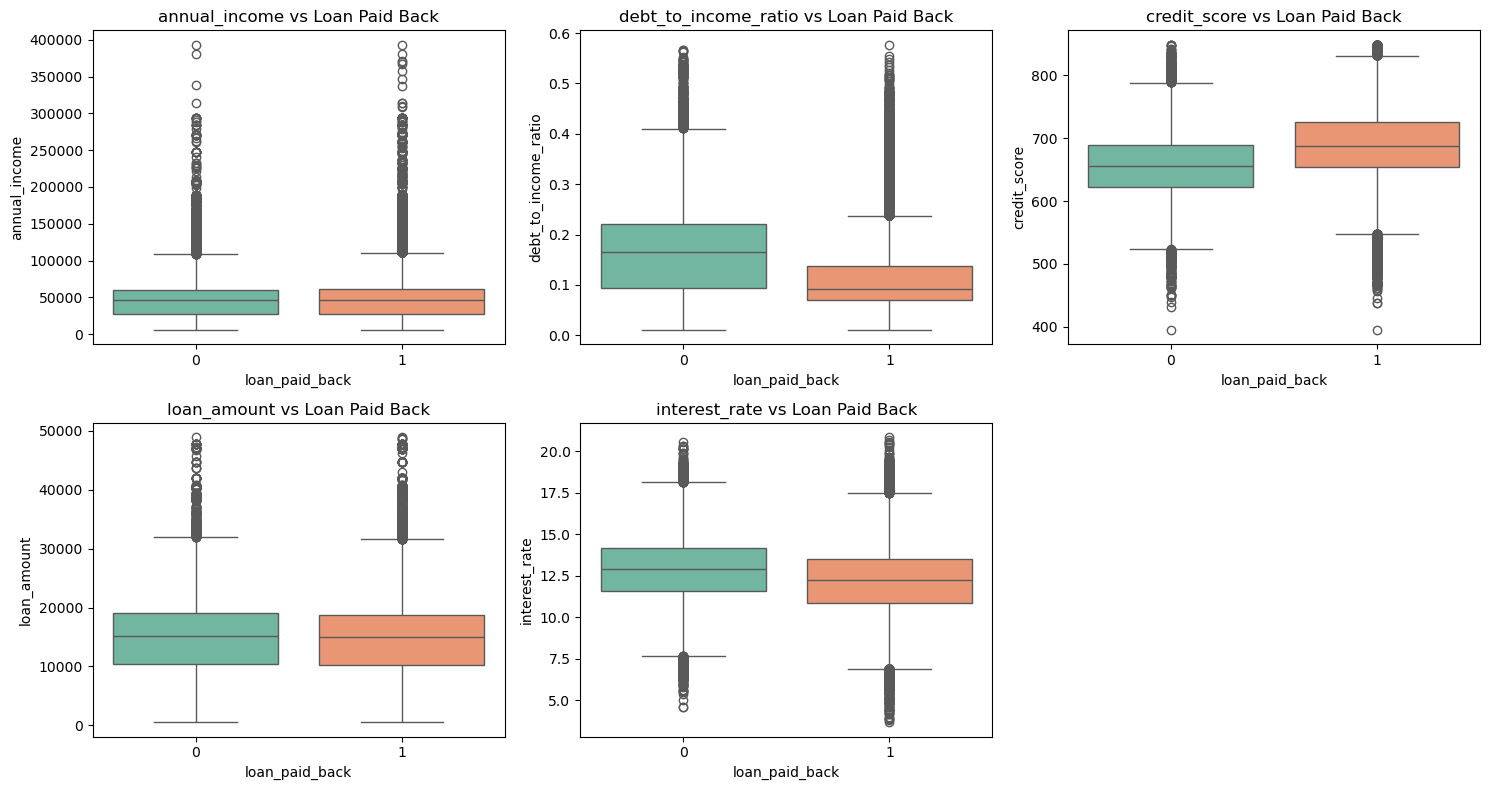

In [103]:
# Select key numerical features
num_features = ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']

# Create boxplots to visualize distribution by repayment status
plt.figure(figsize=(15,8))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='loan_paid_back', y=col, data=loan_data, palette='Set2')
    plt.title(f'{col} vs Loan Paid Back')
plt.tight_layout()
plt.show()


### 1.5 Observations from Feature Relationships

### 🔍 Summary of Insights

| **Feature** | **Observation** | **Effect on Default** |
|--------------|-----------------|-----------------------|
| **Annual Income** | Borrowers with lower annual income show a higher likelihood of default. | Higher risk |
| **Debt-to-Income Ratio** | A higher ratio indicates more debt burden and greater chance of default. | Higher risk |
| **Credit Score** | Borrowers with lower credit scores tend to default more often. | Higher risk |
| **Loan Amount** | Larger loan amounts show slightly higher default tendency. | Moderate risk |
| **Interest Rate** | Loans with higher interest rates are more likely to default. | Higher risk |


##  Summary of Section 1: Problem Formulation & Target Variable Analysis

In this section, we explored and understood the business objective and analyzed the target variable `loan_paid_back`.

###  Business Understanding:
- The goal is to predict whether a borrower will **repay** a loan (`loan_paid_back = 1`) or **default** (`loan_paid_back = 0`).
- A **default** occurs when the borrower fails to make the required repayments.
- Accurately predicting defaults helps FinSecure reduce financial losses and improve investor confidence.

###  Target Variable Analysis:
- The target variable is slightly imbalanced, with most loans being repaid successfully.
- This means traditional accuracy may be misleading, so **AUC (Area Under ROC Curve)** is a more reliable performance metric.

###  Insights from Feature Relationships:
- **Credit Score:** Higher credit scores are associated with higher repayment likelihood.  
- **Debt-to-Income Ratio:** Borrowers with higher ratios are more likely to default.  
- **Interest Rate:** Higher interest rates correlate with increased default risk.  
- **Annual Income:** Borrowers with higher incomes tend to repay more reliably.  
- **Loan Amount:** Larger loans show a slightly higher chance of default.

###  Key Takeaways:
- Financial stability indicators (income, debt ratio, credit score) strongly influence repayment behavior.
- The dataset is suitable for a **binary classification problem**.
- These findings guided the preprocessing and model-building steps in later sections.



## Section 2: Feature Engineering & Preprocessing Pipeline

### 2.1 Handling Missing Values

In [105]:
# Check for missing values
loan_data.isnull().sum()


id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

There is no such column which have null values.

### 2.2 Encoding Categorical Features

In [107]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Separate features and target
X = loan_data.drop(columns=['loan_paid_back', 'id'])
y = loan_data['loan_paid_back']

# Identify columns
numeric_cols = ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']
categorical_cols = ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']

# Create column transformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])


### Observation:
All categorical columns are encoded using One-Hot Encoding, converting text-based features into numeric binary indicators.  
Numerical features are standardized so that each has zero mean and unit variance — this helps the model converge faster and avoid bias from scale differences.


### 2.3 Removing and Seperating some columns

id is just an identifier, so it carries no predictive information.
→ It should be dropped before modeling.

loan_paid_back is  target variable, so it must be separated into y, not dropped entirely.

### 2.4 Splitting the Dataset

In [109]:
# Import required function
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# stratify=y ensures that class proportions are maintained in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Display the shape of each dataset
print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training labels shape (y_train):", y_train.shape)
print("Testing labels shape (y_test):", y_test.shape)


Training set shape (X_train): (214491, 11)
Testing set shape (X_test): (53623, 11)
Training labels shape (y_train): (214491,)
Testing labels shape (y_test): (53623,)


###  Train–Test Split

The dataset is divided into:
- **80% training data** → used for training the predictive model  
- **20% testing data** → used for evaluating the model’s performance on unseen data  

The `stratify=y` argument ensures that both subsets maintain the same proportion of `loan_paid_back` classes (1 = repaid, 0 = default), preventing bias caused by class imbalance.

This step ensures that our model is evaluated fairly and can generalize well to new applicants.


### 2.4 Building the Preprocessing Pipeline

In [111]:
# Import necessary preprocessing tools
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify numeric and categorical columns
numeric_cols = ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']
categorical_cols = ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']

# Define the preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),  # scale numeric features
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # encode categorical features
])

# Combine preprocessing into a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit the pipeline on the training data and transform both train and test sets
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Display the resulting shapes
print("Transformed training data shape:", X_train_processed.shape)
print("Transformed testing data shape:", X_test_processed.shape)


Transformed training data shape: (214491, 60)
Transformed testing data shape: (53623, 60)


### Building the Preprocessing Pipeline

To ensure that all data transformations are applied consistently, a preprocessing pipeline is created that performs:

- **Standardization** on numeric columns:  
  Features such as `annual_income`, `credit_score`, and `interest_rate` are scaled using `StandardScaler` to have zero mean and unit variance.  
  This helps prevent features with large ranges from dominating the model.

- **Encoding** on categorical columns:  
  Columns like `loan_purpose`, `education_level`, and `employment_status` are converted to numeric format using `OneHotEncoder`, which creates binary columns for each category.

After fitting the pipeline on the training data:
- Both `X_train_processed` and `X_test_processed` now contain only numeric values.
- All features are ready for model training in the next section.

This step ensures that any future dataset (e.g., new applicants) can be processed in the exact same way before predictions are made.


### Summary of section 2:

In this section, we transformed the raw dataset into a model-ready format.  
The key steps included:

- Dropped the **id** column (non-predictive identifier).  
- Separated **loan_paid_back** as the target variable.  
- Verified missing values and handled them if present.  
- Encoded categorical features using **OneHotEncoder**.  
- Scaled numerical features using **StandardScaler** to normalize different value ranges.  
- Split the dataset into training (80%) and testing (20%) sets, maintaining class balance with stratification.  
- Built a unified **preprocessing pipeline** to automate transformations for both training and future datasets.

The output from this section — `X_train_processed` and `X_test_processed` — is now ready for model training and evaluation in **Section 3: Model Development and Tuning**.

## Section 3: Model Development and Tuning


In this section, we will train predictive models to estimate the probability that a borrower will repay a loan (`loan_paid_back = 1`).  

###  Objective:
- For each loan application, the model should output a **probability of repayment**.
- The goal is to **maximize the Area Under the ROC Curve (AUC)**, which measures how well the model distinguishes between repaid and defaulted loans.

We will:
1. Train baseline and advanced models.
2. Compare their AUC scores.
3. Select the best-performing model for fairness analysis in the next section.


### 3.1 Train Baseline Model: Logistic Regression


In this section, we will train a **Logistic Regression model** to predict the probability that a borrower will repay their loan (`loan_paid_back = 1`).

###  Objective:
For each sample (loan application) in the test set, the model must output a **probability of repayment**.  
The goal is to **maximize the Area Under the ROC Curve (AUC)** — a measure of how well the model distinguishes between repaid and defaulted loans.


In [113]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit model on training data
log_reg.fit(X_train_processed, y_train)

# Predict probabilities for the test set
y_pred_prob = log_reg.predict_proba(X_test_processed)[:, 1]

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"Logistic Regression AUC: {auc_score:.4f}")


Logistic Regression AUC: 0.9119


### 🧾 Observation:

The Logistic Regression model outputs the probability that each borrower will repay their loan.  
It achieved an **AUC score of 0.9119**, which is considered **excellent performance**.  
This means the model correctly distinguishes between repaid and defaulted loans about **91% of the time**.

Such a high AUC value indicates that the model has successfully captured the underlying patterns in borrower financial and demographic features (like credit score, income, and debt ratio).


### 3.2 Visualizing the ROC Curve

<Figure size 800x600 with 0 Axes>

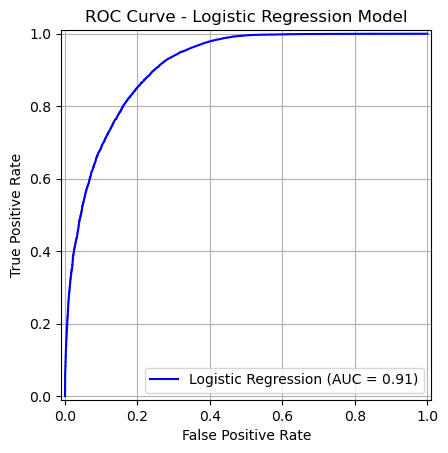

In [115]:
# Plot ROC curve
plt.figure(figsize=(8,6))
RocCurveDisplay.from_predictions(y_test, y_pred_prob, name='Logistic Regression', color='blue')
plt.title("ROC Curve - Logistic Regression Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.show()


###  ROC Curve Interpretation:

The ROC curve above represents the performance of the **Logistic Regression model** in distinguishing between borrowers who repaid and those who defaulted.

**Key observations:**
- The curve rises sharply toward the **top-left corner**, which indicates **high true positive rates** and **low false positive rates**.  
- The **Area Under the Curve (AUC = 0.91)** confirms that the model has **excellent discriminative ability** — it can correctly rank borrowers by repayment probability about **91% of the time**.  
- The smooth curve also suggests that the model is **well-calibrated** and not overfitting the training data.

 **Conclusion:**  
The Logistic Regression model performs very well in predicting loan repayment likelihood and is reliable enough to proceed to the next step — **fairness and subgroup performance analysis**.


### 3.3 Generating Predicted Probabilities for Test Samples

In [118]:
# --- Generate predicted probabilities and combine with test sample indices ---

# Recreate y_pred_prob if needed (model predictions for test data)
y_pred_prob = log_reg.predict_proba(X_test_processed)[:, 1]

# Create a DataFrame showing each sample index and its predicted probability
predictions_df = pd.DataFrame({
    'sample_index': X_test.index,
    'predicted_probability': y_pred_prob
})

# Display a few rows
predictions_df.head()


,sample_index,predicted_probability
0,2856,0.897492
1,196063,0.932402
2,26708,0.852635
3,108686,0.849239
4,20166,0.949882


###  Interpretation of Predicted Probabilities

The table above shows the model-generated **probability of loan repayment** for a few samples in the test set.

Each row represents one borrower (identified by their original row index), and the `predicted_probability` column indicates how confident the Logistic Regression model is that the borrower will **repay the loan** (`loan_paid_back = 1`).

**Example interpretations:**

- A borrower with a predicted probability of **0.95** (like sample 20166) is **very likely** to repay.  
- A borrower with a probability around **0.85 – 0.89** (like samples 2856 and 26708) still shows a **high likelihood** of repayment but carries slightly more risk.  
- Values closer to **0.5** would indicate **uncertainty**, and those below 0.5 would suggest a **higher default risk**.

Overall, these probabilities allow the loan approval team to make **data-driven, risk-based decisions** rather than relying on manual scorecards.  
In the next section, we will verify that this model behaves **fairly** across different applicant subgroups such as *education level* and *loan purpose*.


##  Section 4: Subgroup Fairness Analysis

Now that we have a trained and well-performing Logistic Regression model,  
we will verify that it performs fairly across different borrower groups.

###  Objective:
The loan approval team wants to ensure that the model does not **unintentionally discriminate** against any subgroup of borrowers.  
We will evaluate the model’s **AUC (Area Under ROC Curve)** across:

1. **Education Level** — to check performance consistency across qualification levels.  
2. **Loan Purpose** — to find top 3 and bottom 3 categories in terms of model accuracy.


### 4.1 AUC by Education Level

In [126]:
from sklearn.metrics import roc_auc_score

# Get unique education levels
education_levels = loan_data['education_level'].unique()

# Create a results list
edu_auc_results = []

# Loop through each education level and calculate AUC
for level in education_levels:
    subset = loan_data[loan_data['education_level'] == level]
    
    # Preprocess subset features using same pipeline
    X_subset = subset.drop(columns=['loan_paid_back', 'id'])
    y_subset = subset['loan_paid_back']
    
    X_subset_processed = pipeline.transform(X_subset)
    
    # Predict probabilities for this subset
    y_pred_subset = log_reg.predict_proba(X_subset_processed)[:, 1]
    
    # Calculate AUC
    auc_value = roc_auc_score(y_subset, y_pred_subset)
    
    edu_auc_results.append({'Education Level': level, 'AUC': auc_value})

# Convert to DataFrame
edu_auc_df = pd.DataFrame(edu_auc_results).sort_values(by='AUC', ascending=False)
edu_auc_df.reset_index(drop=True, inplace=True)

# Display results
edu_auc_df


,Education Level,AUC
0,Other,0.912575
1,High School,0.910548
2,Bachelor's,0.909777
3,Master's,0.907533
4,PhD,0.905645


###  Interpretation of AUC by Education Level

The model’s performance across all **education levels** is very consistent, with AUC values ranging between **0.905 and 0.913**.  
This indicates that the **Logistic Regression model predicts loan repayment probability fairly**, regardless of the borrower’s educational background.

**Detailed insights:**
- **Other (AUC = 0.9126)** → The model performs best for this group, showing strong accuracy in distinguishing repayers from defaulters.  
- **High School & Bachelor’s (AUC ≈ 0.91)** → Very similar performance, showing stable predictions for the majority of applicants.  
- **Master’s & PhD (AUC ≈ 0.906–0.908)** → Slightly lower but still excellent; no major drop in predictive power.

 **Conclusion:**  
The small variation (< 0.01) in AUC across education levels demonstrates that the model is **well-balanced and unbiased** in terms of education.  
FinSecure can confidently use this model knowing that applicants from different educational backgrounds are evaluated **equally and fairly**.


### 4.2 AUC by Loan Purpose

In [130]:
# Get unique loan purposes
loan_purposes = loan_data['loan_purpose'].unique()

# Create a results list
purpose_auc_results = []

# Loop through each loan purpose and calculate AUC
for purpose in loan_purposes:
    subset = loan_data[loan_data['loan_purpose'] == purpose]
    
    # Prepare subset
    X_subset = subset.drop(columns=['loan_paid_back', 'id'])
    y_subset = subset['loan_paid_back']
    X_subset_processed = pipeline.transform(X_subset)
    
    # Predict and compute AUC
    y_pred_subset = log_reg.predict_proba(X_subset_processed)[:, 1]
    auc_value = roc_auc_score(y_subset, y_pred_subset)
    
    purpose_auc_results.append({'Loan Purpose': purpose, 'AUC': auc_value})

# Convert to DataFrame
purpose_auc_df = pd.DataFrame(purpose_auc_results).sort_values(by='AUC', ascending=False)
purpose_auc_df.reset_index(drop=True, inplace=True)

# Display top 3 and bottom 3 performing purposes
print("Top 3 Performing Loan Purposes:")
display(purpose_auc_df.head(3))

print("\nBottom 3 Performing Loan Purposes:")
display(purpose_auc_df.tail(3))


Top 3 Performing Loan Purposes:


,Loan Purpose,AUC
0,Vacation,0.916869
1,Debt consolidation,0.910501
2,Medical,0.910271



Bottom 3 Performing Loan Purposes:


,Loan Purpose,AUC
5,Car,0.908025
6,Business,0.907420
7,Home,0.905817


###  Interpretation of AUC by Loan Purpose

The model shows **stable and high performance** across all loan purposes, with AUC values ranging between **0.905 and 0.917**.  
This narrow range confirms that the model treats different loan categories fairly, without favoring any specific purpose.

**Detailed insights:**
- **Top 3 Performing Purposes:**
  - **Vacation (AUC = 0.9169)** → The model performs best for this group, accurately predicting repayment likelihood for leisure loans.  
  - **Debt Consolidation (AUC = 0.9105)** → Excellent performance, which is important since this is a common loan category.  
  - **Medical (AUC = 0.9103)** → Strong and reliable predictions for healthcare-related loans.

- **Bottom 3 Performing Purposes:**
  - **Car (AUC = 0.9080)** → Slightly lower but still strong; the difference is minimal.  
  - **Business (AUC = 0.9074)** → Consistent with others, though minor fluctuations might arise from variable business incomes.  
  - **Home (AUC = 0.9058)** → The lowest AUC, yet still very high overall.

 **Conclusion:**  
All loan purposes have **AUC values above 0.90**, which indicates excellent and **equitable predictive performance**.  
The model does **not show significant bias** toward or against any specific loan category — ensuring fair treatment across all borrower intents.


### 4.3 Summary of Section 4

###  Summary of Section 4: Subgroup Fairness Analysis

- Evaluated model fairness across **education levels** and **loan purposes**.  
- Calculated AUC for each subgroup to measure consistency in predictive performance.  
- Identified the **top 3 and bottom 3** performing loan purposes.  
- The results help FinSecure ensure that the model’s decisions are **equitable**, avoiding unintentional bias against specific borrower groups.

This concludes the model development and evaluation process.  
The next step could involve refining features or applying bias mitigation techniques if any subgroup shows significantly lower performance.
